# Set-2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

1) i) Implement Mid-point filter after including the appropriate density of Gaussian noise in the image and analyse the performance of the filter by increasing the noise level

In [49]:
from scipy.ndimage import maximum_filter, minimum_filter

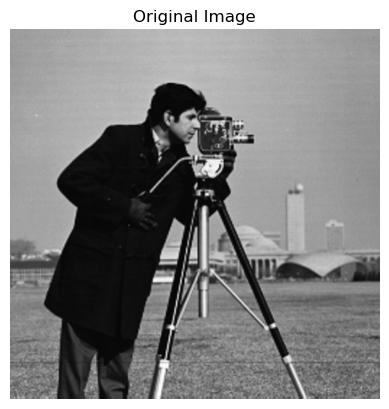

In [3]:
image_1 = cv2.imread('/home/arj/TriSem3/ComputerVision/SET_2_ESE_2/Set-2-q1.tif', 0)
plt.imshow(image_1, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [5]:
#minimum filter
min_filtered = cv2.erode(image_1, np.ones((5, 5), np.uint8))

In [6]:
#maximum filter
max_filtered = cv2.dilate(image_1, np.ones((5, 5), np.uint8))

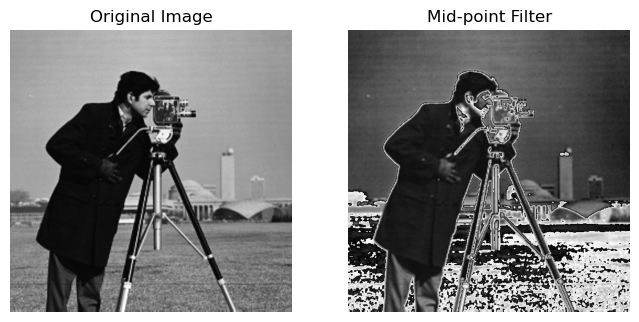

In [14]:
# Mid Point filter

def midpoint_filter_grayscale(image, kernel_size=3):
    max_filter = maximum_filter(image_1, size=kernel_size)
    min_filter = minimum_filter(image_1, size=kernel_size)
    midpoint_image = (max_filter + min_filter) / 2
    return midpoint_image

midpoint_img_1 = midpoint_filter_grayscale(image_1)

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(midpoint_img_1, cmap='gray')
plt.title('Mid-point Filter')
plt.axis('off')
plt.show()

In [12]:
# mid point filter is used for Noise Reduction and Smoothing
# This filter provides a balance between the effects of the max and min filters

1) ii) Apply Alpha-trimmed filters after including salt & pepper and Gaussian noise. (After implementing alpha-trimmed filter change the d value as 0 and mn-1 and write your inference).

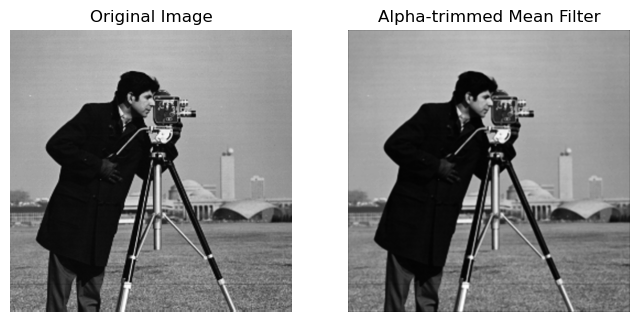

In [15]:
# alpha-trimmed filter

def alpha_trimmed_mean_filter_grayscale(image, kernel_size=3, alpha=2):
    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), 'constant')
    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighborhood = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            trimmed = np.sort(neighborhood)[alpha:-alpha]
            output_image[i, j] = np.mean(trimmed)
    return output_image

alpha_trimmed_img_1 = alpha_trimmed_mean_filter_grayscale(image_1)

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(alpha_trimmed_img_1, cmap='gray')
plt.title('Alpha-trimmed Mean Filter')
plt.axis('off')
plt.show()

In [ ]:
# Noise Reduction, particularly in environments with specific types of noise

2)  i) Find the gradient of the attached image in each direction (horizontal Gx and vertical Gy) using Sobel, Prewitt and Robert approximation methods and display the horizontal, vertical and combined edges.

In [21]:
image_2 = cv2.imread('/home/arj/TriSem3/ComputerVision/SET_2_ESE_2/set-2-q2.tif', cv2.IMREAD_GRAYSCALE)

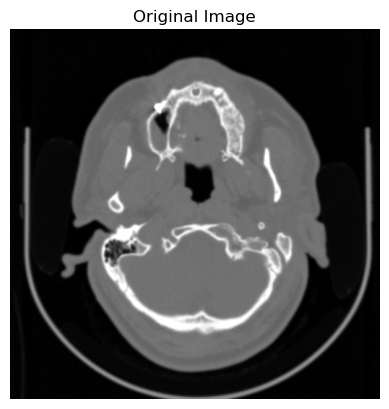

In [22]:
plt.imshow(image_2, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [26]:
type(image_2)

numpy.ndarray

In [23]:
# Define kernels for Sobel, Prewitt, and Robert operators
kernel_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

kernel_robert_x = np.array([[1, 0], [0, -1]])
kernel_robert_y = np.array([[0, -1], [1, 0]])

In [39]:
# Apply Sobel operators
sobel_x = cv2.filter2D(image_2, -1, kernel_sobel_x)
sobel_y = cv2.filter2D(image_2, -1, kernel_sobel_y)

print("shape of arrays are : ", sobel_x.shape, sobel_y.shape)
print("dtype of arrays are : ", sobel_x.dtype, sobel_y.dtype)
print("depth of arrays are : ", sobel_x.ndim, sobel_y.ndim)


shape of arrays are :  (512, 512) (512, 512)
dtype of arrays are :  uint8 uint8
depth of arrays are :  2 2


In [40]:
# Convert the data type to float32 if necessary
sobel_x = sobel_x.astype(np.float32)
sobel_y = sobel_y.astype(np.float32)

# Calculate the magnitude
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

In [43]:
# Apply Prewitt operators
prewitt_x = cv2.filter2D(image_2, -1, kernel_prewitt_x)
prewitt_y = cv2.filter2D(image_2, -1, kernel_prewitt_y)

prewitt_x = prewitt_x.astype(np.float32)
prewitt_y= prewitt_y.astype(np.float32)

prewitt_combined = cv2.magnitude(prewitt_x, prewitt_y)



In [44]:
# Apply Robert operators
robert_x = cv2.filter2D(image_2, -1, kernel_robert_x)
robert_y = cv2.filter2D(image_2, -1, kernel_robert_y)

robert_x = robert_x.astype(np.float32)
robert_y = robert_y.astype(np.float32)

robert_combined = cv2.magnitude(robert_x, robert_y)

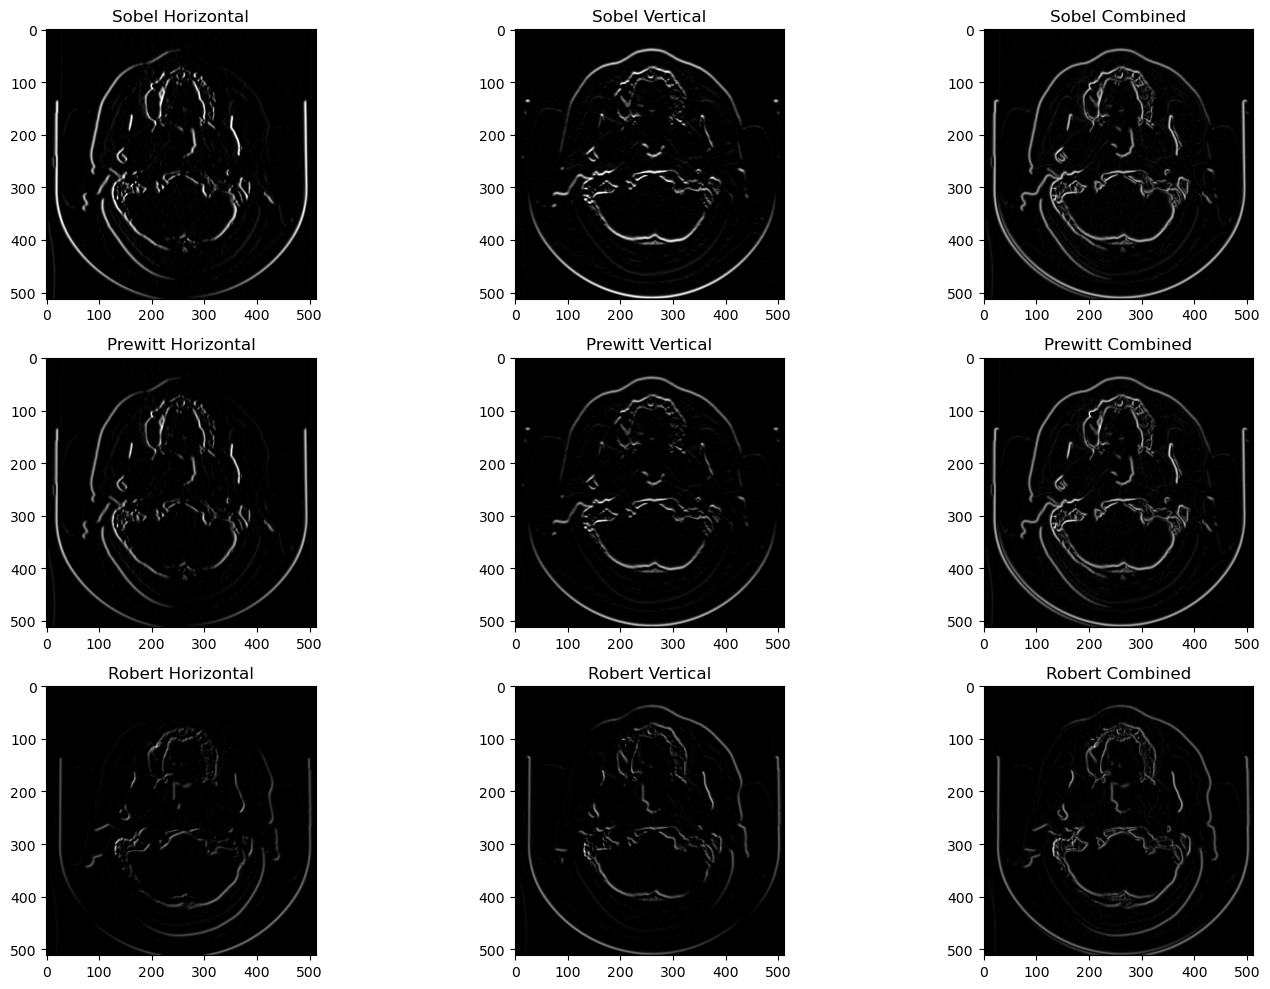

In [47]:
plt.figure(figsize=(15, 10))

# Sobel
plt.subplot(3, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel Horizontal')
plt.subplot(3, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Vertical')
plt.subplot(3, 3, 3)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')

# Prewitt
plt.subplot(3, 3, 4)
plt.imshow(prewitt_x, cmap='gray')
plt.title('Prewitt Horizontal')
plt.subplot(3, 3, 5)
plt.imshow(prewitt_y, cmap='gray')
plt.title('Prewitt Vertical')
plt.subplot(3, 3, 6)
plt.imshow(prewitt_combined, cmap='gray')
plt.title('Prewitt Combined')

# Robert
plt.subplot(3, 3, 7)
plt.imshow(robert_x, cmap='gray')
plt.title('Robert Horizontal')
plt.subplot(3, 3, 8)
plt.imshow(robert_y, cmap='gray')
plt.title('Robert Vertical')
plt.subplot(3, 3, 9)
plt.imshow(robert_combined, cmap='gray')
plt.title('Robert Combined')

plt.tight_layout()
plt.show()

ii) Interpret the results of the above three methods and justify how magnitude of gradient operator is used to detect the edges.

In [48]:
# The displayed images show the horizontal, vertical, and combined edge detections 
# obtained using Sobel, Prewitt, and Robert operators, respectively, 
# providing insights into the direction and strength of edges present in the original image.